In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 2.03
b = 4.75
c = -6.53
d = 5.91

def used_func(x: np.ndarray) -> np.ndarray:
    x_flat = x.flatten()
    A_mat = np.array([[0, 1], [-c/a, -b/a]])
    B_vec = np.array([0, d/a])
    x_derivative = A_mat.dot(x_flat) + B_vec
    return x_derivative[np.newaxis, :]

def forward_euler(fun, x0, Tf, h):
    """
    Explicit Euler integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0

    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k] + h * fun(x_hist[:, k])

    return x_hist, t

def backward_euler(fun, x0, Tf, h, tol=1e-8, max_iter=100):
    """
    Implicit Euler integration method using fixed-point iteration
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0

    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k]  # Initial guess

        for i in range(max_iter):
            x_next = x_hist[:, k] + h * fun(x_hist[:, k + 1])
            error = np.linalg.norm(x_next - x_hist[:, k + 1])
            x_hist[:, k + 1] = x_next

            if error < tol:
                break

    return x_hist, t

def runge_kutta4(fun, x0, Tf, h):
    """
    4th order Runge-Kutta integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0

    for k in range(len(t) - 1):
        k1 = fun(x_hist[:, k])
        k2 = fun(x_hist[:, k] + 0.5 * h * k1)
        k3 = fun(x_hist[:, k] + 0.5 * h * k2)
        k4 = fun(x_hist[:, k] + h * k3)

        x_hist[:, k + 1] = x_hist[:, k] + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

    return x_hist, t

def exact_func(Tf: int, h: int):
    c1 = 664411/856400
    c2 = 195171/856400
    r1 = 0.971
    r2 = -3.311
    xp = d / c
    t = np.arange(0, Tf + h, h)
    x = c1 * np.exp(r1 * t) + c2 * np.exp(r2 * t) + xp
    return x, t

In [2]:
# Test all integrators
x0 = np.array([0.1, 0.0])  # Initial state: [angle, angular_velocity]
Tf = 10.0
h = 0.001

x, t = exact_func(Tf, h)

# Forward Euler
x_fe, t_fe = forward_euler(used_func, x0, Tf, h)

# Backward Euler
x_be, t_be = backward_euler(used_func, x0, Tf, h)

# Runge-Kutta 4
x_rk4, t_rk4 = runge_kutta4(used_func, x0, Tf, h)

In [3]:
means = {}
last_10_idx = slice(-10, None)

means['Exact'] = np.mean(x[last_10_idx], axis=0)
means['Forward Euler'] = np.mean(x_fe[-1][last_10_idx], axis=0)
means['Backward Euler'] = np.mean(x_be[-1][last_10_idx], axis=0)
means['Runge-Kutta 4'] = np.mean(x_rk4[-1][last_10_idx], axis=0)

With dt = 0.001
Mean of last 10 values:
Exact: Mean = 12730.127070985802
Forward Euler: Mean = 12383.029550253861, Error vs exact = 347.097521
Backward Euler: Mean = 12500.386659445701, Error vs exact = 229.740412
Runge-Kutta 4: Mean = 12441.531741774228, Error vs exact = 288.595329


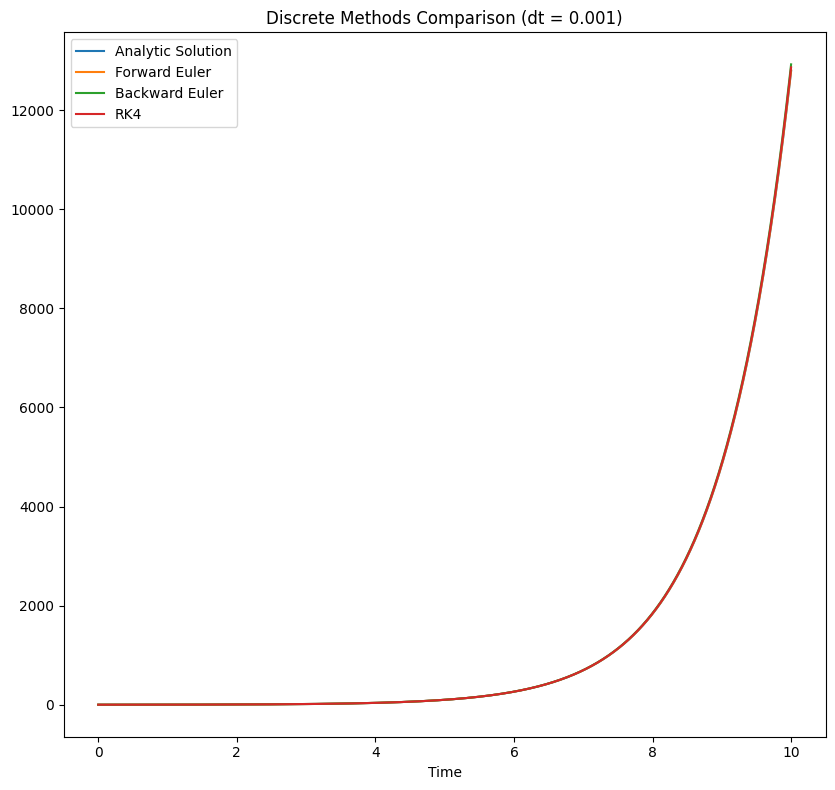

In [4]:
# Plot results
plt.figure(figsize=(24, 8))

# Plot analytic solution
plt.subplot(1, 3, 1)
plt.plot(t, x, label='Analytic Solution')
plt.plot(t_fe, x_fe[0, :], label='Forward Euler')
plt.plot(t_be, x_be[0, :], label='Backward Euler')
plt.plot(t_rk4, x_rk4[0, :], label='RK4')
plt.xlabel('Time')
plt.title('Discrete Methods Comparison (dt = {})'.format(h))
plt.legend()

print(f"With dt = {h}")
print("Mean of last 10 values:")
for method, mean_val in means.items():
    if method != 'Exact':
        error = np.linalg.norm(mean_val - means['Exact'])
        print(f"{method}: Mean = {mean_val}, Error vs exact = {error:.6f}")
    else:
        print(f"{method}: Mean = {mean_val}")

plt.tight_layout()
plt.show()